(SHIFT-81909) Крестьянова Анастасия Сергеевна

**2 часть – соревнование**

Данные представляют собой более миллиона записей с более чем 100 признаками и одной целевой переменной:  
«итоговый_статус_займа». Значения: 0 – выплачен, 1 – не выплачен.  
*Задача – бинарная классификация.*

В вашем распоряжении будет два датасета: один тренировочный (с целевой переменной), и один тестовый – без целевой переменной.  
Также в архиве находится ноутбук baseline.ipynb с примером подготовки файла с ответом.

In [390]:
import pandas as pd
import numpy as np
import datetime as dt
from scipy import stats

import seaborn as sns
from matplotlib import pyplot as plt
import plotly

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# **Подготовка данных: ⭐️train и ✍️test**

In [ ]:
train = pd.read_csv('D:/Skillfactory/data/shift_ml_2025_train.csv', sep=',')

### **1. Общая информация**

In [392]:
train.head(2)

,id,сумма_займа,срок_займа,процентная_ставка,аннуитет,рейтинг,допрейтинг,профессия_заемщика,стаж,владение_жильем,годовой_доход,подтвержден_ли_доход,итоговый_статус_займа,рейтинг_OCR,платежный_график,коэфф_акционных_зачислений_в_остатке,цель_займа,кол_во_субсидий_за_год,индекс_проживания,регион,пдн,пос_стоп_фактор,юридический_статус,кол-во_просрочек_за_два_года,коэфф_невыплаченного_сумм_остатка,коэфф_исходного_платежа,дата_первого_займа,нижний_порог_рейтинга_заемщика,верхний_порог_рейтинга_заемщика,кол-во_заявок_за_полгода,кол-во_месяцев_с_последней_просрочки,кол-во_месяцев_с_последнего_займа,кол-во_открытых_счетов,кол-во_записей_в_общедоступных_документах,оборотный_баланс,коэфф_загрузки_возобновляемого_счета,кол-во_счетов,первоначальный_статус_займа,непогашенная_сумма_из_тела_займов,сумма_выплат_по_просрочкам,пени_за_дефолт,дата_следующей_выплаты,грейд_на_детерминаторе,кол-во_взысканий_за_последний_год,кол-во_месяцев_с_последнего_нарушения,код_политики,тип_займа,совокупный_доход_заемщиков,совокупный_пдн_заемщиков,совокупный_статус_подтверждения_доходов_заемщиков,кол-во_текущих_просроченных_счетов,общая_сумма_взысканий,возвраты_с_учетом_мпл,общая_сумма_на_счетах,кол-во_открытых_счетов_за_полгода,кол-во_текущих_аннуитетных_счетов,кол-во_аннуитетных_счетов_за_год,кол-во_аннуитетных_счетов_за_2_года,кол-во_месяцев_с_посл_аннуитетного_счета,текущий_баланс_по_аннуитетным_счетам,соотношение_сумм_текущего_баланса_к_лимиту_по_аннуитетным_счетам,кол-во_возоб_счетов_за_год,кол-во_возоб_счетов_за_2_года,макс_баланс_по_возоб_счетам,соотношение_баланса_к_лимиту_общее,общий_лимит_по_возоб_счету,кол-во_финансовых_запросов,кол-во_финансовых_операций,кол-во_заявок_на_кредит_за_год,кол-во_открытых_счетов_за_2_года,средний_баланс_текущих_счетов,суммарная_доступная_сумма_займа_по_картам,соотношение_баланса_к_лимиту_по_картам,кол-во_списаний_за_год,сумма_задолженности,кол-во_месяцев_с_первого_аннуитетного_счета,кол-во_месяцев_с_первого_возобновляемого_счета,кол-во_месяцев_с_последнего_возобновляемого_счета,кол-во_месяцев_с_последнего_счета,кол-во_ипотек,кол-во_месяцев_с_последней_карты,кол-во_мес_с_последней_задолженности_по_карте,кол-во_мес_с_последней_заявки,кол-во_мес_с_последней_задолженности_по_возобновляемому_счету,кол-во_счетов_с_просрочкой_4_мес,кол-во_активных_карт,кол-во_активных_возобновляемых_счетов,кол-во_карт_без_нарушений,кол-во_карт,кол-во_аннуитетных_счетов,кол-во_открытых_возобновляемых_счетов,кол-во_возобновляемых_счетов,кол-во_возобновляемых_счетов_с_балансом_более_0,кол-во_счетов_без_нарушений,кол-во_счетов_с_акт_просрочкой_4_мес_обн_2_мес,кол-во_счетов_с_акт_просрочкой_1_мес,кол-во_счетов_с_акт_просрочкой_3_мес_за_2_года,кол-во_счетов_за_посл_год,процент_счетов_без_просрочек,процент_счетов_прев_75_лимита,кол-во_публ_банкротств,кол-во_залогов,кредитный_лимит,кредитный_баланс_без_ипотеки,лимит_по_картам,лимит_по_аннуитетным_счетам,кредитный_баланс_по_возоб_счетам,особая_ситуация,тип_предоставления_кредита
0,68355089,1235000.0,3 года,11.99,41014.0,В,В1,инженер,10+ лет,ИПОТЕКА,1300000.0,Не подтвержден,0,4,n,0.899168,мелкий_бизнес,0,577.0,Новгородская область,16.06,Нет,Нет,1.0,1.345312e+06,0.767016,12-1999,715.0,719.0,4.0,6.0,NaN,22.0,0.0,21470.0,19.2,38.0,а,0.0,0.0,False,NaN,5,0.0,NaN,1.0,Индивидуальный,NaN,NaN,NaN,0.0,0.0,12213,10219800.0,1.0,1.0,0.0,1.0,19.0,900250.0,73.0,2.0,3.0,6472.0,29.0,5590000.0,0.0,0.0,6.0,4.0,486650.0,2891500.0,27.1,0.0,0.0,113.0,192.0,2.0,2.0,4.0,2.0,NaN,0.0,6.0,0.0,5.0,5.0,13.0,17.0,6.0,20.0,27.0,5.0,22.0,0.0,0.0,0.0,2.0,97.4,7.7,0.0,0.0,15700850.0,1973750.0,3965000.0,1233350.0,NaN,Нет,Наличные
1,68341763,1000000.0,5 лет,10.78,21633.0,Б,Б4,водитель грузовика,10+ лет,ИПОТЕКА,1260000.0,Не подтвержден,0,2,n,0.489891,улучшение_жилищных_условий,0,605.0,Республика Татарстан,10.78,Нет,Нет,0.0,1.345312e+06,0.229990,8-2000,695.0,699.0,0.0,NaN,NaN,6.0,0.0,7869.0,56.2,18.0,а,0.0,0.0,NaN,NaN,1,0.0,NaN,1.0,Совместный,3550000.0,13.85,Не подтвержден,0.0,0.0,36245,9484950.0,0.0,1.0,0.0,4.0,19.0,541350.0,73.0,0.0,2.0,2

In [393]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1210779 entries, 0 to 1210778
Columns: 109 entries, id to тип_предоставления_кредита
dtypes: float64(84), int64(6), object(19)
memory usage: 1006.9+ MB


In [394]:
train.describe()

,id,сумма_займа,процентная_ставка,аннуитет,годовой_доход,итоговый_статус_займа,рейтинг_OCR,коэфф_акционных_зачислений_в_остатке,кол_во_субсидий_за_год,индекс_проживания,пдн,кол-во_просрочек_за_два_года,коэфф_невыплаченного_сумм_остатка,коэфф_исходного_платежа,нижний_порог_рейтинга_заемщика,верхний_порог_рейтинга_заемщика,кол-во_заявок_за_полгода,кол-во_месяцев_с_последней_просрочки,кол-во_месяцев_с_последнего_займа,кол-во_открытых_счетов,кол-во_записей_в_общедоступных_документах,оборотный_баланс,коэфф_загрузки_возобновляемого_счета,кол-во_счетов,непогашенная_сумма_из_тела_займов,сумма_выплат_по_просрочкам,дата_следующей_выплаты,грейд_на_детерминаторе,кол-во_взысканий_за_последний_год,кол-во_месяцев_с_последнего_нарушения,код_политики,совокупный_доход_заемщиков,совокупный_пдн_заемщиков,кол-во_текущих_просроченных_счетов,общая_сумма_взысканий,возвраты_с_учетом_мпл,общая_сумма_на_счетах,кол-во_открытых_счетов_за_полгода,кол-во_текущих_аннуитетных_счетов,кол-во_аннуитетных_счетов_за_год,кол-во_аннуитетных_счетов_за_2_года,кол-во_месяцев_с_посл_аннуитетного_счета,текущий_баланс_по_аннуитетным_счетам,соотношение_сумм_текущего_баланса_к_лимиту_по_аннуитетным_счетам,кол-во_возоб_счетов_за_год,кол-во_возоб_счетов_за_2_года,макс_баланс_по_возоб_счетам,соотношение_баланса_к_лимиту_общее,общий_лимит_по_возоб_счету,кол-во_финансовых_запросов,кол-во_финансовых_операций,кол-во_заявок_на_кредит_за_год,кол-во_открытых_счетов_за_2_года,средний_баланс_текущих_счетов,суммарная_доступная_сумма_займа_по_картам,соотношение_баланса_к_лимиту_по_картам,кол-во_списаний_за_год,сумма_задолженности,кол-во_месяцев_с_первого_аннуитетного_счета,кол-во_месяцев_с_первого_возобновляемого_счета,кол-во_месяцев_с_последнего_возобновляемого_счета,кол-во_месяцев_с_последнего_счета,кол-во_ипотек,кол-во_месяцев_с_последней_карты,кол-во_мес_с_последней_задолженности_по_карте,кол-во_мес_с_последней_заявки,кол-во_мес_с_последней_задолженности_по_возобновляемому_счету,кол-во_счетов_с_просрочкой_4_мес,кол-во_активных_карт,кол-во_активных_возобновляемых_счетов,кол-во_карт_без_нарушений,кол-во_карт,кол-во_аннуитетных_счетов,кол-во_открытых_возобновляемых_счетов,кол-во_возобновляемых_счетов,кол-во_возобновляемых_счетов_с_балансом_более_0,кол-во_счетов_без_нарушений,кол-во_счетов_с_акт_просрочкой_4_мес_обн_2_мес,кол-во_счетов_с_акт_просрочкой_1_мес,кол-во_счетов_с_акт_просрочкой_3_мес_за_2_года,кол-во_счетов_за_посл_год,процент_счетов_без_просрочек,процент_счетов_прев_75_лимита,кол-во_публ_банкротств,кол-во_залогов,кредитный_лимит,кредитный_баланс_без_ипотеки,лимит_по_картам,лимит_по_аннуитетным_счетам,кредитный_баланс_по_возоб_счетам
count,1.210779e+06,1.210779e+06,1.210779e+06,1.210779e+06,1.210779e+06,1.210779e+06,1.210779e+06,1.210779e+06,1.210779e+06,1.210778e+06,1.210441e+06,1.210779e+06,1.210779e+06,1.210779e+06,1.210779e+06,1.210779e+06,1.210778e+06,600218.000000,205662.000000,1.210779e+06,1.210779e+06,1.210779e+06,1.210010e+06,1.210779e+06,1210779.0,1.210779e+06,0.0,1.210779e+06,1.210732e+06,318659.000000,1210779.0,2.323300e+04,23231.000000,1.210779e+06,1.150012e+06,1.210779e+06,1.150012e+06,483877.000000,483878.000000,483878.000000,483878.000000,471070.000000,4.838780e+05,418388.000000,483878.000000,483878.000000,483878.000000,483827.000000,1.150012e+06,483878.000000,483877.000000,483877.000000,1.168297e+06,1.149991e+06,1.155808e+06,1.155116e+06,1.210732e+06,1.210779e+06,1.115759e+06,1.150011e+06,1.150011e+06,1.150012e+06,1.168297e+06,1.156649e+06,287262.000000,1.054242e+06,405180.000000,1.150012e+06,1.150012e+06,1.150012e+06,1.160572e+06,1.150012e+06,1.150012e+06,1.150012e+06,1.150011e+06,1.150012e+06,1.160572e+06,1.105262e+06,1.150012e+06,1.150012e+06,1.150012e+06,1.149877e+06,1.155448e+06,1.210161e+06,1.210745e+06,1.150012e+06,1.168297e+06,1.168297e+06,1.150012e+06,16808.000000
mean,5.634301e+07,7.210352e+05,1.323988e+01,2.190478e+04,1.525304e+06,1.996186e-01,2.499915e+00,5.000210e-01,3.009005e-01,5.155637e+02,1.828660e+01,3.178334e-01,1.345312e+06,4.999140e-01,6.9

In [395]:
train.isna().shape[0]

1210779

⭐️

In [396]:
cols_type = train.select_dtypes(include=['object']).columns.tolist()
cols_type

['срок_займа',
 'рейтинг',
 'допрейтинг',
 'профессия_заемщика',
 'стаж',
 'владение_жильем',
 'подтвержден_ли_доход',
 'платежный_график',
 'цель_займа',
 'регион',
 'пос_стоп_фактор',
 'юридический_статус',
 'дата_первого_займа',
 'первоначальный_статус_займа',
 'пени_за_дефолт',
 'тип_займа',
 'совокупный_статус_подтверждения_доходов_заемщиков',
 'особая_ситуация',
 'тип_предоставления_кредита']

In [397]:
object_cols = ['срок_займа', 'рейтинг', 'допрейтинг', 'профессия_заемщика',
'стаж', 'владение_жильем', 'подтвержден_ли_доход', 'платежный_график',
'цель_займа', 'регион', 'пос_стоп_фактор', 'юридический_статус',
'дата_первого_займа', 'первоначальный_статус_займа', 'пени_за_дефолт',
'тип_займа', 'совокупный_статус_подтверждения_доходов_заемщиков',
'особая_ситуация', 'тип_предоставления_кредита']
display(train.loc[:, object_cols].head())

,срок_займа,рейтинг,допрейтинг,профессия_заемщика,стаж,владение_жильем,подтвержден_ли_доход,платежный_график,цель_займа,регион,пос_стоп_фактор,юридический_статус,дата_первого_займа,первоначальный_статус_займа,пени_за_дефолт,тип_займа,совокупный_статус_подтверждения_доходов_заемщиков,особая_ситуация,тип_предоставления_кредита
0,3 года,В,В1,инженер,10+ лет,ИПОТЕКА,Не подтвержден,n,мелкий_бизнес,Новгородская область,Нет,Нет,12-1999,а,False,Индивидуальный,NaN,Нет,Наличные
1,5 лет,Б,Б4,водитель грузовика,10+ лет,ИПОТЕКА,Не подтвержден,n,улучшение_жилищных_условий,Республика Татарстан,Нет,Нет,8-2000,а,NaN,Совместный,Не подтвержден,Нет,Наличные
2,3 года,В,В3,ветеринарный техник,4 года,АРЕНДА,Подтвержден источник,n,консолидация_долга,Республика Коми,Под вопросом,Нет,10-1987,а,False,Индивидуальный,NaN,Нет,Наличные
3,3 года,Б,Б2,вице-президент операций по набору персонала,10+ лет,ИПОТЕКА,Не подтвержден,n,консолидация_долга,Томская область,Нет,Нет,6-1990,б,NaN,Индивидуальный,NaN,Нет,Наличные
4,3 года,Б,Б1,дорожному водителю,10+ лет,ИПОТЕКА,Не подтвержден,n,крупная_покупка,Белгородская область,Нет,Да,2-1999,а,False,Индивидуальный,NaN,Нет,Наличные


Видим, что у нас есть 19 столбцов типа object. Все они содержат либо два варианта (Да/Нет, 3 года/5лет), либо несколько типов категорий (как аренда, ипотека, другое, собственное жильё) и т.д. Их нужно будет преобразовать, что сделаем мы позже.

### **2.1 Поиск дубликатов и выбросов**

In [398]:
test_dupl = list(train.columns)
mask = train.duplicated(subset = test_dupl)
test_duplicates = train[mask]
print(f'Число найденных дубликатов: {test_duplicates.shape[0]}') 

Число найденных дубликатов: 0


*О как.* Здорово  

Выберем несколько признаков, по которым могут быть выбросы и визуализируем их

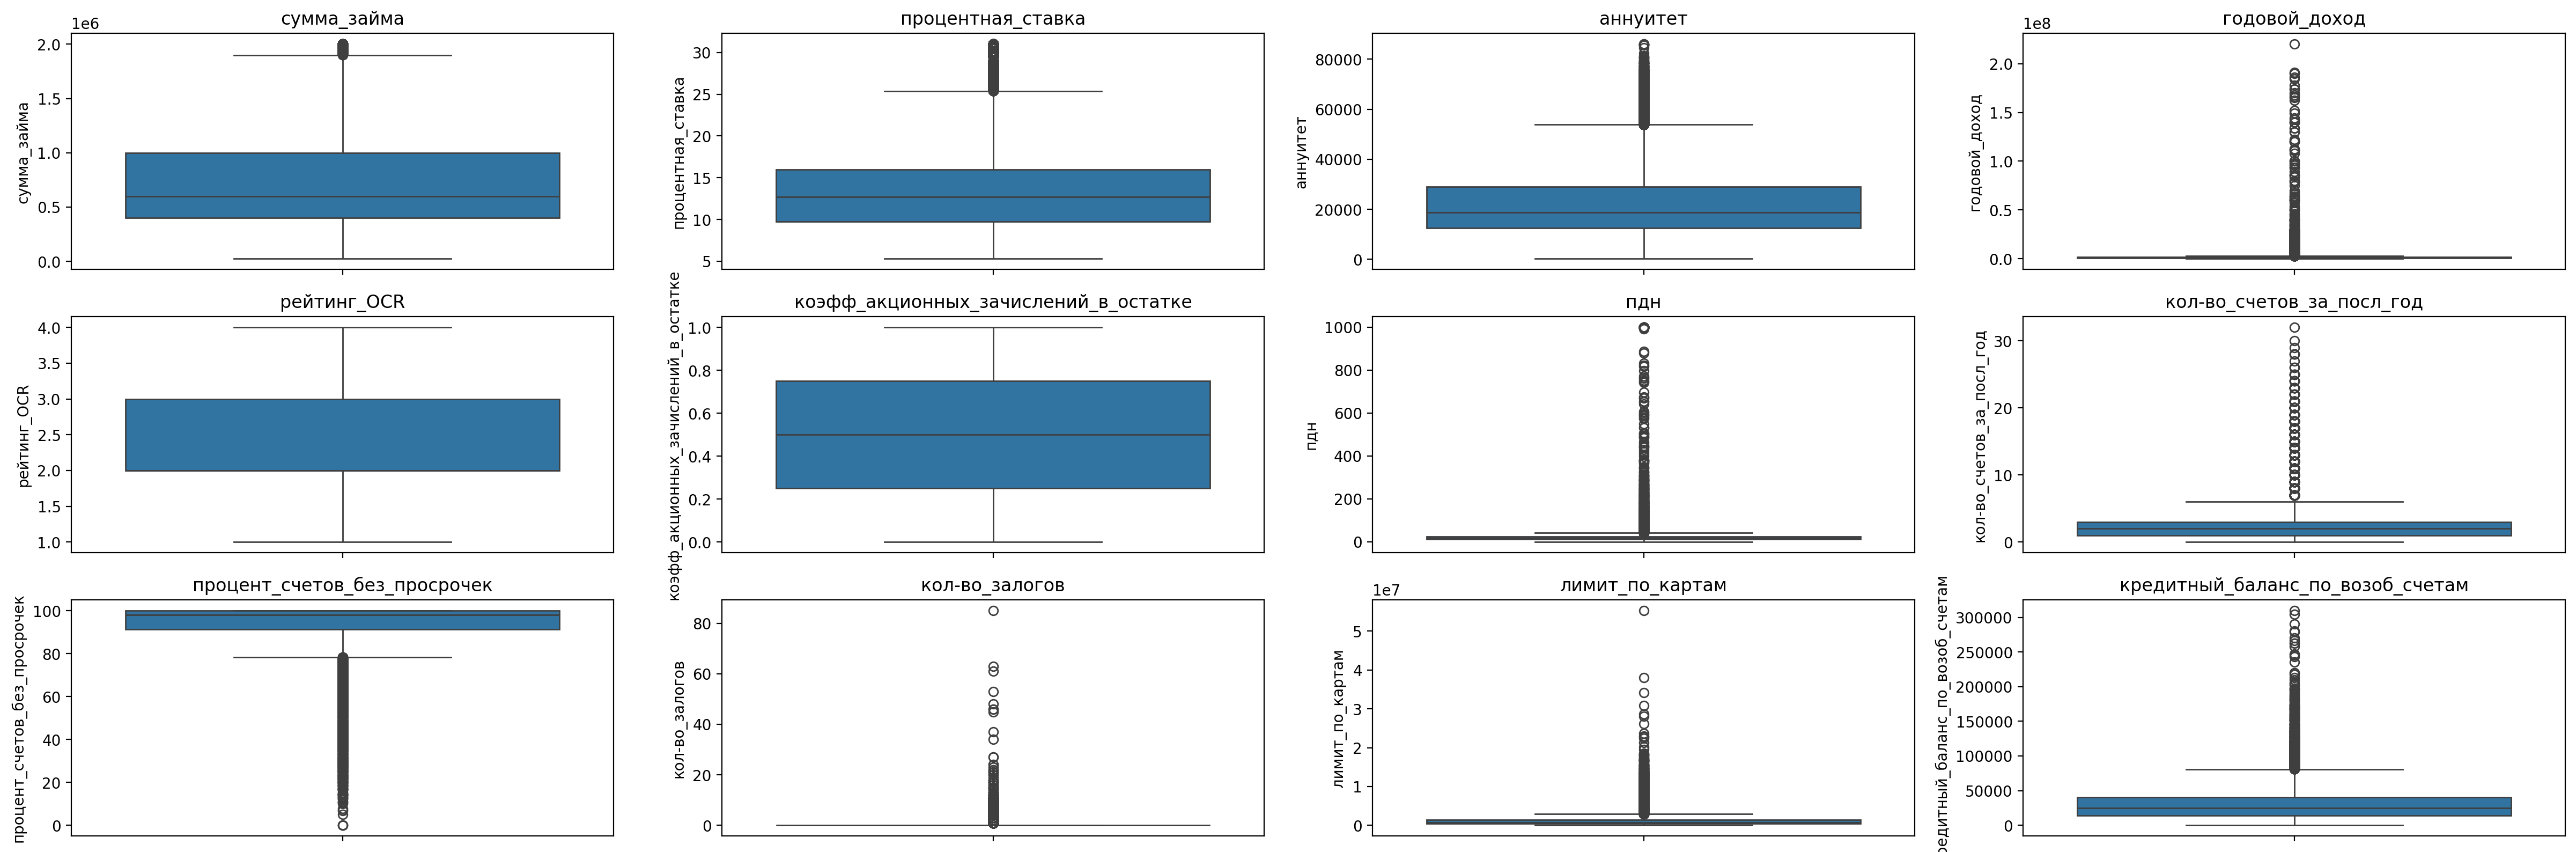

In [399]:
outliers = ['сумма_займа', 'процентная_ставка', 'аннуитет',
            'годовой_доход', 'рейтинг_OCR', 'коэфф_акционных_зачислений_в_остатке',
            'пдн', 'кол-во_счетов_за_посл_год', 'процент_счетов_без_просрочек',
            'кол-во_залогов', 'лимит_по_картам','кредитный_баланс_по_возоб_счетам'
]

plt.figure(figsize=(30, 20))
for i, col in enumerate(outliers, 1):
    plt.subplot(6, 4, i)
    sns.boxplot(y = train[col])
    plt.title(col)
plt.show()

Видим большое количество выбросов. Особенно нам важны: *сумма займа*, *годовой догод*, *лимит по картам*.  

In [400]:
Q1 = train[col].quantile(0.25)
Q3 = train[col].quantile(0.75)
IQR = Q3 - Q1
outliers = train[(train[col] < (Q1 - 1.5*IQR)) | (train[col] > (Q3 + 1.5*IQR))]
outliers

,id,сумма_займа,срок_займа,процентная_ставка,аннуитет,рейтинг,допрейтинг,профессия_заемщика,стаж,владение_жильем,годовой_доход,подтвержден_ли_доход,итоговый_статус_займа,рейтинг_OCR,платежный_график,коэфф_акционных_зачислений_в_остатке,цель_займа,кол_во_субсидий_за_год,индекс_проживания,регион,пдн,пос_стоп_фактор,юридический_статус,кол-во_просрочек_за_два_года,коэфф_невыплаченного_сумм_остатка,коэфф_исходного_платежа,дата_первого_займа,нижний_порог_рейтинга_заемщика,верхний_порог_рейтинга_заемщика,кол-во_заявок_за_полгода,кол-во_месяцев_с_последней_просрочки,кол-во_месяцев_с_последнего_займа,кол-во_открытых_счетов,кол-во_записей_в_общедоступных_документах,оборотный_баланс,коэфф_загрузки_возобновляемого_счета,кол-во_счетов,первоначальный_статус_займа,непогашенная_сумма_из_тела_займов,сумма_выплат_по_просрочкам,пени_за_дефолт,дата_следующей_выплаты,грейд_на_детерминаторе,кол-во_взысканий_за_последний_год,кол-во_месяцев_с_последнего_нарушения,код_политики,тип_займа,совокупный_доход_заемщиков,совокупный_пдн_заемщиков,совокупный_статус_подтверждения_доходов_заемщиков,кол-во_текущих_просроченных_счетов,общая_сумма_взысканий,возвраты_с_учетом_мпл,общая_сумма_на_счетах,кол-во_открытых_счетов_за_полгода,кол-во_текущих_аннуитетных_счетов,кол-во_аннуитетных_счетов_за_год,кол-во_аннуитетных_счетов_за_2_года,кол-во_месяцев_с_посл_аннуитетного_счета,текущий_баланс_по_аннуитетным_счетам,соотношение_сумм_текущего_баланса_к_лимиту_по_аннуитетным_счетам,кол-во_возоб_счетов_за_год,кол-во_возоб_счетов_за_2_года,макс_баланс_по_возоб_счетам,соотношение_баланса_к_лимиту_общее,общий_лимит_по_возоб_счету,кол-во_финансовых_запросов,кол-во_финансовых_операций,кол-во_заявок_на_кредит_за_год,кол-во_открытых_счетов_за_2_года,средний_баланс_текущих_счетов,суммарная_доступная_сумма_займа_по_картам,соотношение_баланса_к_лимиту_по_картам,кол-во_списаний_за_год,сумма_задолженности,кол-во_месяцев_с_первого_аннуитетного_счета,кол-во_месяцев_с_первого_возобновляемого_счета,кол-во_месяцев_с_последнего_возобновляемого_счета,кол-во_месяцев_с_последнего_счета,кол-во_ипотек,кол-во_месяцев_с_последней_карты,кол-во_мес_с_последней_задолженности_по_карте,кол-во_мес_с_последней_заявки,кол-во_мес_с_последней_задолженности_по_возобновляемому_счету,кол-во_счетов_с_просрочкой_4_мес,кол-во_активных_карт,кол-во_активных_возобновляемых_счетов,кол-во_карт_без_нарушений,кол-во_карт,кол-во_аннуитетных_счетов,кол-во_открытых_возобновляемых_счетов,кол-во_возобновляемых_счетов,кол-во_возобновляемых_счетов_с_балансом_более_0,кол-во_счетов_без_нарушений,кол-во_счетов_с_акт_просрочкой_4_мес_обн_2_мес,кол-во_счетов_с_акт_просрочкой_1_мес,кол-во_счетов_с_акт_просрочкой_3_мес_за_2_года,кол-во_счетов_за_посл_год,процент_счетов_без_просрочек,процент_счетов_прев_75_лимита,кол-во_публ_банкротств,кол-во_залогов,кредитный_лимит,кредитный_баланс_без_ипотеки,лимит_по_картам,лимит_по_аннуитетным_счетам,кредитный_баланс_по_возоб_счетам,особая_ситуация,тип_предоставления_кредита
338074,130267600,1000000.0,5 лет,30.65,32754.0,Е,Е4,менеджер по закупкам,4 года,ИПОТЕКА,900000.0,Подтвержден,1,1,n,0.239614,кредитная_карта,0,800.0,Хабаровский край,43.63,Нет,Нет,0.0,1.345312e+06,0.850127,11-2008,685.0,689.0,0.0,NaN,118.0,18.0,1.0,13659.0,56.9,21.0,а,0.0,0.0,True,NaN,2,0.0,NaN,1.0,Совместный,7250000.0,32.01,Подтвержден,0.0,0.0,34942,26453150.0,0.0,9.0,1.0,3.0,8.0,3702500.0,102.0,0.0,1.0,2412.0,85.0,1200000.0,1.0,1.0,1.0,5.0,1469600.0,131450.0,69.4,0.0,0.0,89.0,112.0,22.0,8.0,1.0,35.0,NaN,8.0,NaN,0.0,3.0,7.0,3.0,4.0,11.0,8.0,9.0,7.0,18.0,0.0,0.0,0.0,1.0,100.0,33.3,1.0,0.0,27957100.0,4385450.0,430000.0,4066850.0,89861.0,Нет,Наличные
338139,130368940,1400000.0,3 года,24.84,55545.5,Д,Д3,технический сотрудник сис,< 1 года,АРЕНДА,720000.0,Подтвержден,1,1,n,0.962004,консолидация_долга,0,895.0,Красноярский край,112.20,Нет,Нет,0.0,1.345312e+06,0.847351,5-2003,700.0,704.0,0.0,64.0,NaN,28.0,0.0,68311.0,61.8,50.0,б,0.0,0.0,NaN,NaN,5,0.0,64.0,1.0,Совместный,6800000.0,35.98,Подтвержден,0.0,0.0,42249,9014350.0,1.0,6.0,1.0,4.0

891 выброс для 1.2 млн строк выглядят не так плохо. Посмотрим, где чаще всего они находятся

In [401]:
outliers_cnt = outliers.apply(lambda x: x.notna().sum())
display(outliers_cnt.sort_values(ascending=False).head(10))

id                      891
сумма_займа             891
срок_займа              891
процентная_ставка       891
аннуитет                891
рейтинг                 891
допрейтинг              891
годовой_доход           891
владение_жильем         891
подтвержден_ли_доход    891
dtype: int64

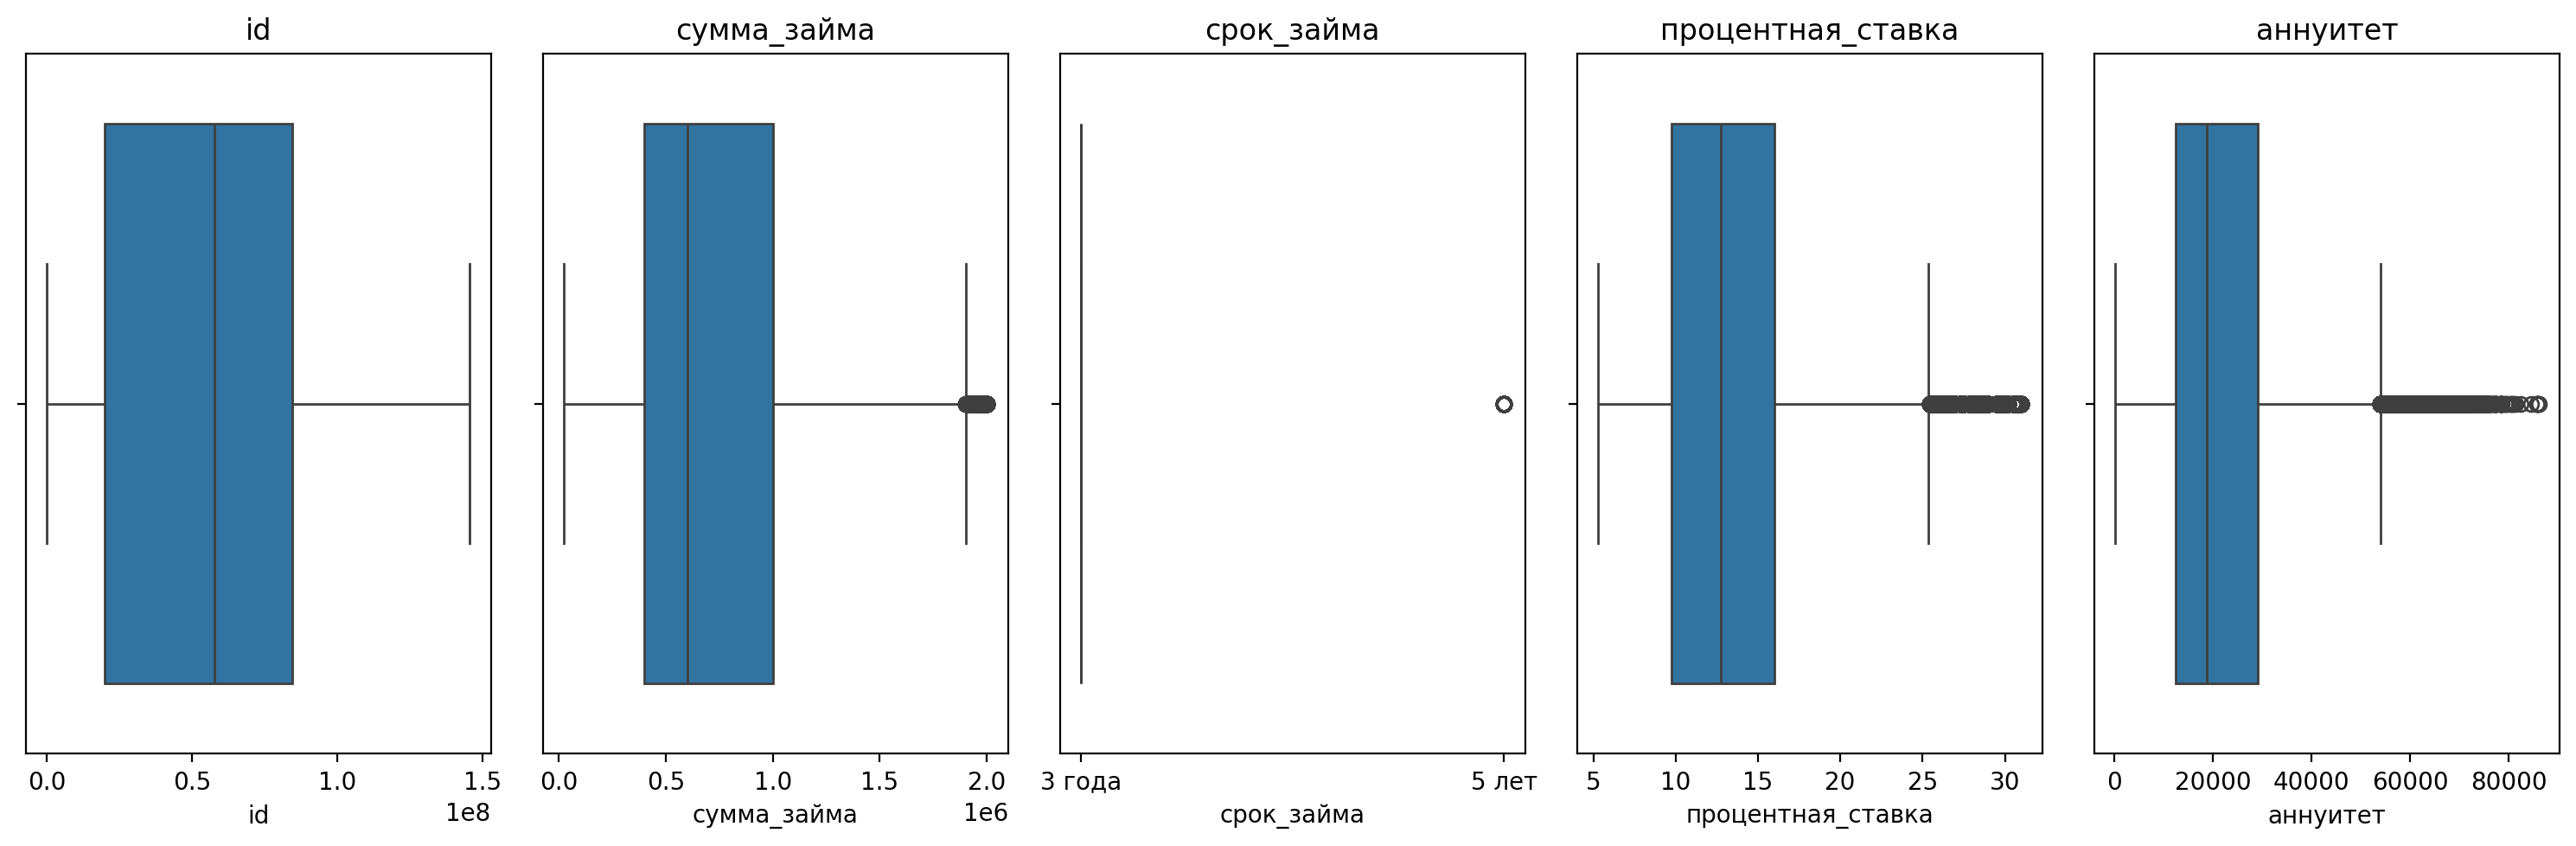

In [402]:
top_columns = outliers_cnt.sort_values(ascending=False).index[:5]

plt.figure(figsize=(15, 5))
for i, col in enumerate(top_columns, 1):
    plt.subplot(1, 5, i)
    sns.boxplot(x=train[col])
    plt.title(col)
plt.tight_layout()
plt.show()

### **2.2 Поиск пропусков**

Поищем пропуски в данном датасете.  
Вычислим средний по столбцам результат метода isnull() и получим долю пропусков в каждом столбце. Также, найдём столбцы, где доля пропусков больше 0.  

Отобразим графически для лучшего восприятия

дата_следующей_выплаты                               100.000000
кредитный_баланс_по_возоб_счетам                      98.611803
совокупный_статус_подтверждения_доходов_заемщиков     98.096267
совокупный_пдн_заемщиков                              98.081318
совокупный_доход_заемщиков                            98.081153
                                                        ...    
кол-во_взысканий_за_последний_год                      0.003882
кол-во_списаний_за_год                                 0.003882
кол-во_залогов                                         0.002808
кол-во_заявок_за_полгода                               0.000083
индекс_проживания                                      0.000083
Length: 69, dtype: float64

<Axes: title={'center': 'Распределение пропусков в данных'}>

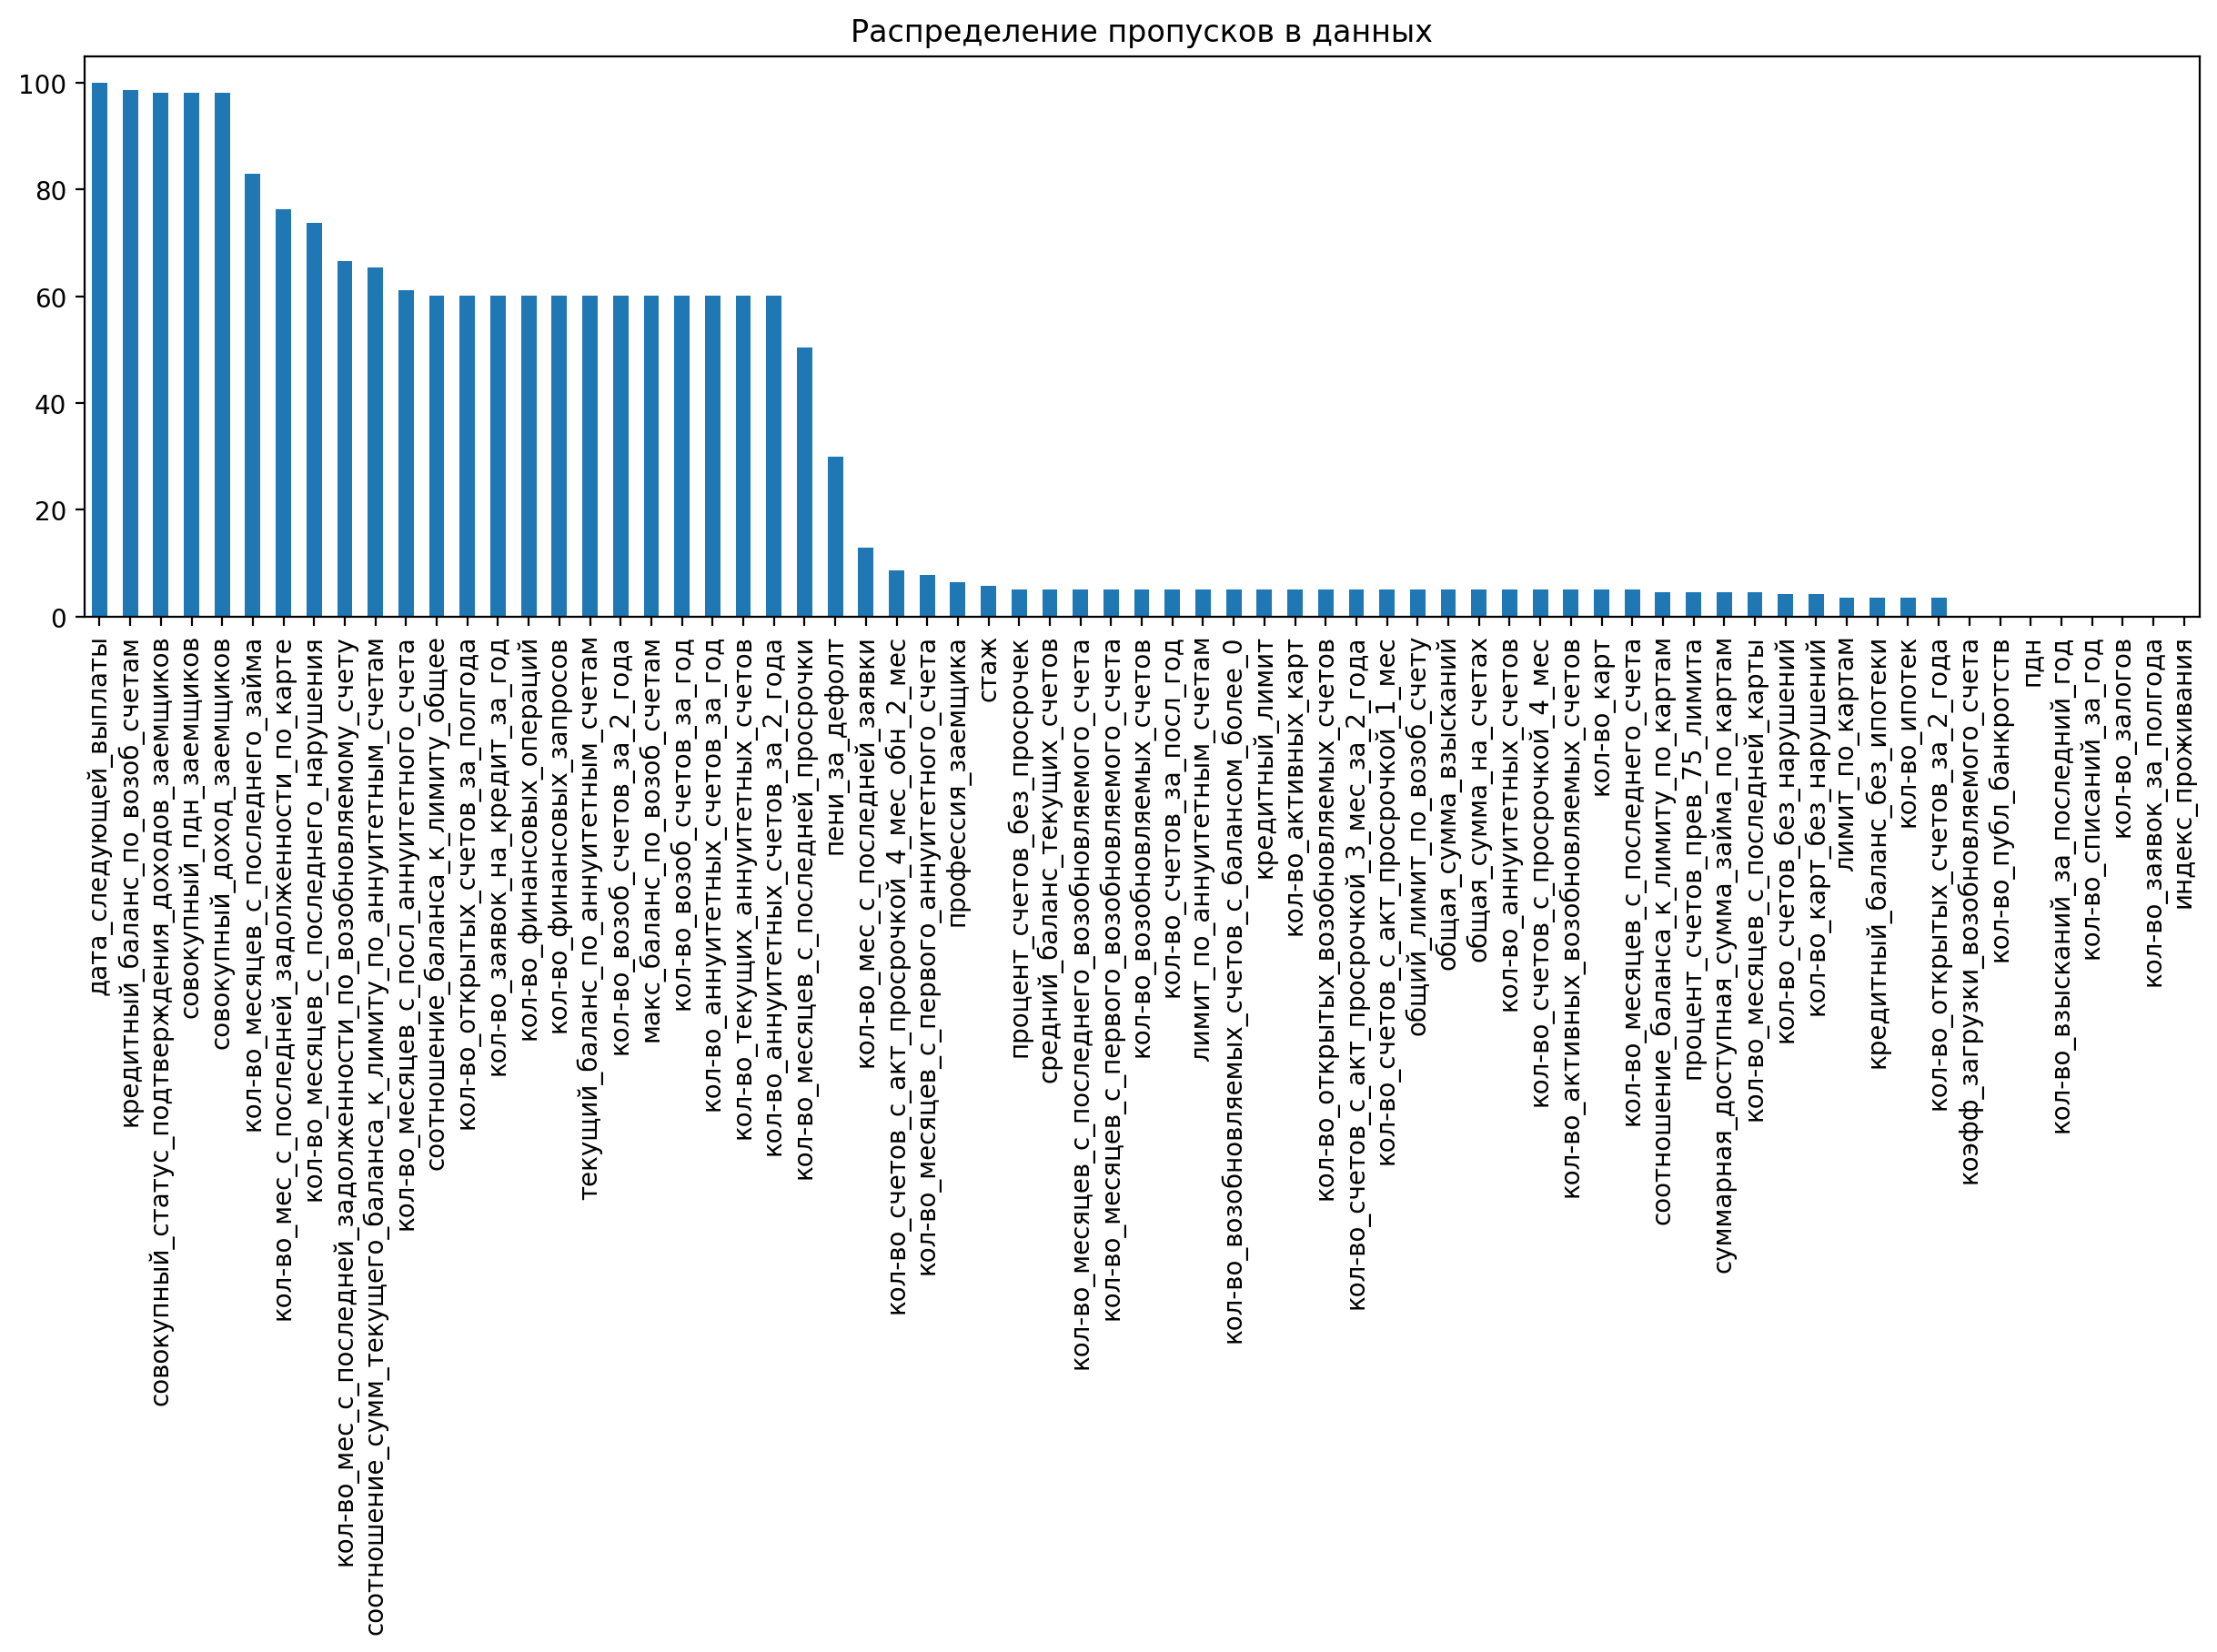

In [403]:
train_null = train.isnull().mean() * 100
cols_with_null = train_null[train_null > 0].sort_values(ascending=False)
display(cols_with_null)

# Визуализируем
cols_with_null.plot(
    kind='bar',
    figsize=(15, 4),
    title='Распределение пропусков в данных'
)

Мы нашли 69 столбцов с пропусками. Не будем удалять все столбцы, на данный момент удалим только те, где практически отсутствуют данные.  

In [404]:
null_cols = ['дата_следующей_выплаты','кредитный_баланс_по_возоб_счетам',
            'совокупный_статус_подтверждения_доходов_заемщиков', 'совокупный_пдн_заемщиков',
            'совокупный_доход_заемщиков', 'кол-во_месяцев_с_последнего_займа',
            'кол-во_мес_с_последней_задолженности_по_карте','кол-во_месяцев_с_последнего_нарушения']
display(train_null.loc[null_cols])

дата_следующей_выплаты                               100.000000
кредитный_баланс_по_возоб_счетам                      98.611803
совокупный_статус_подтверждения_доходов_заемщиков     98.096267
совокупный_пдн_заемщиков                              98.081318
совокупный_доход_заемщиков                            98.081153
кол-во_месяцев_с_последнего_займа                     83.014076
кол-во_мес_с_последней_задолженности_по_карте         76.274613
кол-во_месяцев_с_последнего_нарушения                 73.681489
dtype: float64

In [405]:
train_drop = train.drop(columns=null_cols)

Делаем небольшой порог в 70%. Удалим столбцы с числом пропусков более 30%

In [406]:
cols_to_drop = train_null[train_null > 0.3].index.tolist()
if 'лимит_по_картам' in cols_to_drop:
    cols_to_drop.remove('лимит_по_картам')

cols_to_drop = [col for col in cols_to_drop if col in train_drop.columns]
train_drop = train_drop.drop(columns=cols_to_drop)

In [407]:
pd.set_option('display.width', 1000)
display(train_drop.head())

,id,сумма_займа,срок_займа,процентная_ставка,аннуитет,рейтинг,допрейтинг,владение_жильем,годовой_доход,подтвержден_ли_доход,итоговый_статус_займа,рейтинг_OCR,платежный_график,коэфф_акционных_зачислений_в_остатке,цель_займа,кол_во_субсидий_за_год,индекс_проживания,регион,пдн,пос_стоп_фактор,юридический_статус,кол-во_просрочек_за_два_года,коэфф_невыплаченного_сумм_остатка,коэфф_исходного_платежа,дата_первого_займа,нижний_порог_рейтинга_заемщика,верхний_порог_рейтинга_заемщика,кол-во_заявок_за_полгода,кол-во_открытых_счетов,кол-во_записей_в_общедоступных_документах,оборотный_баланс,коэфф_загрузки_возобновляемого_счета,кол-во_счетов,первоначальный_статус_займа,непогашенная_сумма_из_тела_займов,сумма_выплат_по_просрочкам,грейд_на_детерминаторе,кол-во_взысканий_за_последний_год,код_политики,тип_займа,кол-во_текущих_просроченных_счетов,возвраты_с_учетом_мпл,кол-во_списаний_за_год,сумма_задолженности,кол-во_публ_банкротств,кол-во_залогов,лимит_по_картам,особая_ситуация,тип_предоставления_кредита
0,68355089,1235000.0,3 года,11.99,41014.0,В,В1,ИПОТЕКА,1300000.0,Не подтвержден,0,4,n,0.899168,мелкий_бизнес,0,577.0,Новгородская область,16.06,Нет,Нет,1.0,1.345312e+06,0.767016,12-1999,715.0,719.0,4.0,22.0,0.0,21470.0,19.2,38.0,а,0.0,0.0,5,0.0,1.0,Индивидуальный,0.0,12213,0.0,0.0,0.0,0.0,3965000.0,Нет,Наличные
1,68341763,1000000.0,5 лет,10.78,21633.0,Б,Б4,ИПОТЕКА,1260000.0,Не подтвержден,0,2,n,0.489891,улучшение_жилищных_условий,0,605.0,Республика Татарстан,10.78,Нет,Нет,0.0,1.345312e+06,0.229990,8-2000,695.0,699.0,0.0,6.0,0.0,7869.0,56.2,18.0,а,0.0,0.0,1,0.0,1.0,Совместный,0.0,36245,0.0,0.0,0.0,0.0,310000.0,Нет,Наличные
2,68426831,597500.0,3 года,13.44,20259.0,В,В3,АРЕНДА,680000.0,Подтвержден источник,0,3,n,0.938662,консолидация_долга,0,300.0,Республика Коми,10.20,Под вопросом,Нет,0.0,1.345312e+06,0.961341,10-1987,690.0,694.0,0.0,5.0,0.0,8822.0,68.4,6.0,а,0.0,0.0,4,0.0,1.0,Индивидуальный,0.0,53551,0.0,0.0,0.0,0.0,470000.0,Нет,Наличные
3,68476668,1000000.0,3 года,9.17,31879.0,Б,Б2,ИПОТЕКА,3600000.0,Не подтвержден,0,1,n,0.868177,консолидация_долга,0,550.0,Томская область,14.67,Нет,Нет,0.0,1.345312e+06,0.290727,6-1990,680.0,684.0,0.0,12.0,0.0,87329.0,84.5,27.0,б,0.0,0.0,3,0.0,1.0,Индивидуальный,0.0,48391,0.0,0.0,0.0,0.0,1575000.0,Нет,Наличные
4,67275481,1000000.0,3 года,8.49,31563.0,Б,Б1,ИПОТЕКА,1700000.0,Не подтвержден,0,4,n,0.249254,крупная_покупка,0,293.0,Белгородская область,17.61,Нет,Да,1.0,1.345312e+06,0.688898,2-1999,705.0,709.0,0.0,8.0,0.0,826.0,5.7,15.0,а,0.0,0.0,2,0.0,1.0,Индивидуальный,0.0,96028,0.0,0.0,0.0,0.0,725000.0,Нет,Наличные


In [408]:
train_drop.isnull().sum().sort_values(ascending=False)

лимит_по_картам                              42482
коэфф_загрузки_возобновляемого_счета           769
кол-во_публ_банкротств                         618
пдн                                            338
кол-во_списаний_за_год                          47
кол-во_взысканий_за_последний_год               47
кол-во_залогов                                  34
кол-во_заявок_за_полгода                         1
индекс_проживания                                1
id                                               0
сумма_займа                                      0
процентная_ставка                                0
срок_займа                                       0
рейтинг                                          0
допрейтинг                                       0
владение_жильем                                  0
аннуитет                                         0
кол_во_субсидий_за_год                           0
цель_займа                                       0
коэфф_акционных_зачислений_в_ос

У нас остались признаки с 5% пропусками. Заполним их медианой/нулём

In [409]:
# словарь с признаками которые надо заполнить
values = {
    'лимит_по_картам':train_drop['лимит_по_картам'].fillna(0),
    'кол-во_заявок_за_полгода':train_drop['кол-во_заявок_за_полгода'].fillna(0),
    'коэфф_загрузки_возобновляемого_счета':train_drop['коэфф_загрузки_возобновляемого_счета'].median(),
    'кол-во_публ_банкротств':train_drop['кол-во_публ_банкротств'].median(),
    'кол-во_взысканий_за_последний_год':train_drop['кол-во_взысканий_за_последний_год'].median(),
    'кол-во_списаний_за_год':train_drop['кол-во_списаний_за_год'].median(),
    'кол-во_залогов':train_drop['кол-во_залогов'].median(),
    'пдн':train_drop['пдн'].median()
}
train_drop = train_drop.fillna(values)
train_drop.isnull().mean().sort_values(ascending=False)

индекс_проживания                            8.259146e-07
id                                           0.000000e+00
сумма_займа                                  0.000000e+00
процентная_ставка                            0.000000e+00
срок_займа                                   0.000000e+00
рейтинг                                      0.000000e+00
допрейтинг                                   0.000000e+00
владение_жильем                              0.000000e+00
аннуитет                                     0.000000e+00
годовой_доход                                0.000000e+00
подтвержден_ли_доход                         0.000000e+00
рейтинг_OCR                                  0.000000e+00
итоговый_статус_займа                        0.000000e+00
платежный_график                             0.000000e+00
коэфф_акционных_зачислений_в_остатке         0.000000e+00
цель_займа                                   0.000000e+00
кол_во_субсидий_за_год                       0.000000e+00
регион        

In [410]:
train_drop = train_drop.drop(columns='индекс_проживания')

### **2.3 Неинформативные признаки**

In [411]:
low_information_cols = [] 

for col in train_drop.columns:
    # наибольшая относительная частота в признаке
    top_freq = train_drop[col].value_counts(normalize=True).max()
    # доля уникальных значений от размера признака
    nunique_ratio = train_drop[col].nunique() / train_drop[col].count()
    # сравниваем наибольшую частоту с порогом
    if top_freq > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(top_freq*100, 2)}% одинаковых значений')
    # сравниваем долю уникальных значений с порогом
    if nunique_ratio > 0.95:
        low_information_cols.append(col)
        print(f'{col}: {round(nunique_ratio*100, 2)}% уникальных значений')

id: 100.0% уникальных значений
платежный_график: 100.0% одинаковых значений
коэфф_акционных_зачислений_в_остатке: 100.0% уникальных значений
коэфф_невыплаченного_сумм_остатка: 100.0% одинаковых значений
коэфф_исходного_платежа: 100.0% уникальных значений
непогашенная_сумма_из_тела_займов: 100.0% одинаковых значений
сумма_выплат_по_просрочкам: 95.57% одинаковых значений
кол-во_взысканий_за_последний_год: 98.44% одинаковых значений
код_политики: 100.0% одинаковых значений
тип_займа: 98.08% одинаковых значений
кол-во_текущих_просроченных_счетов: 99.52% одинаковых значений
кол-во_списаний_за_год: 99.2% одинаковых значений
сумма_задолженности: 99.62% одинаковых значений
кол-во_залогов: 96.78% одинаковых значений
особая_ситуация: 100.0% одинаковых значений
тип_предоставления_кредита: 99.49% одинаковых значений


100% значений (столбец *id* не трогаем): 
- платежный_график – *содержит в себе "n"*, 
- коэфф_акционных_зачислений_в_остатке – *содержит значения коэффициента по типу 0.4589*, 
- коэфф_невыплаченного_сумм_остатка – ***все строки** содержат значения коэффициента по типу 1.345312e+06*, 
- коэфф_исходного_платежа – *содержит значения коэффициента по типу 0.81261*, 
- непогашенная_сумма_из_тела_займов – ***все строки** содержат 0*, 
- код_политики – ***все строки** содержат 1*, 
- особая_ситуация – ***все строки** содержат "нет"*

Удалим все 100% признаки (и ещё пару 98-99%)

In [412]:
cols_to_drop = [
    'платежный_график', 'коэфф_акционных_зачислений_в_остатке',
    'коэфф_невыплаченного_сумм_остатка', 'коэфф_исходного_платежа',
    'непогашенная_сумма_из_тела_займов','код_политики', 'регион', 'цель_займа', 'тип_займа',
    'кол-во_текущих_просроченных_счетов', 'кол-во_списаний_за_год','допрейтинг',
    'сумма_задолженности', 'особая_ситуация', 'тип_предоставления_кредита'
]
train_clean = train_drop.drop(columns=cols_to_drop)

### **3. Распределения, корреляции**

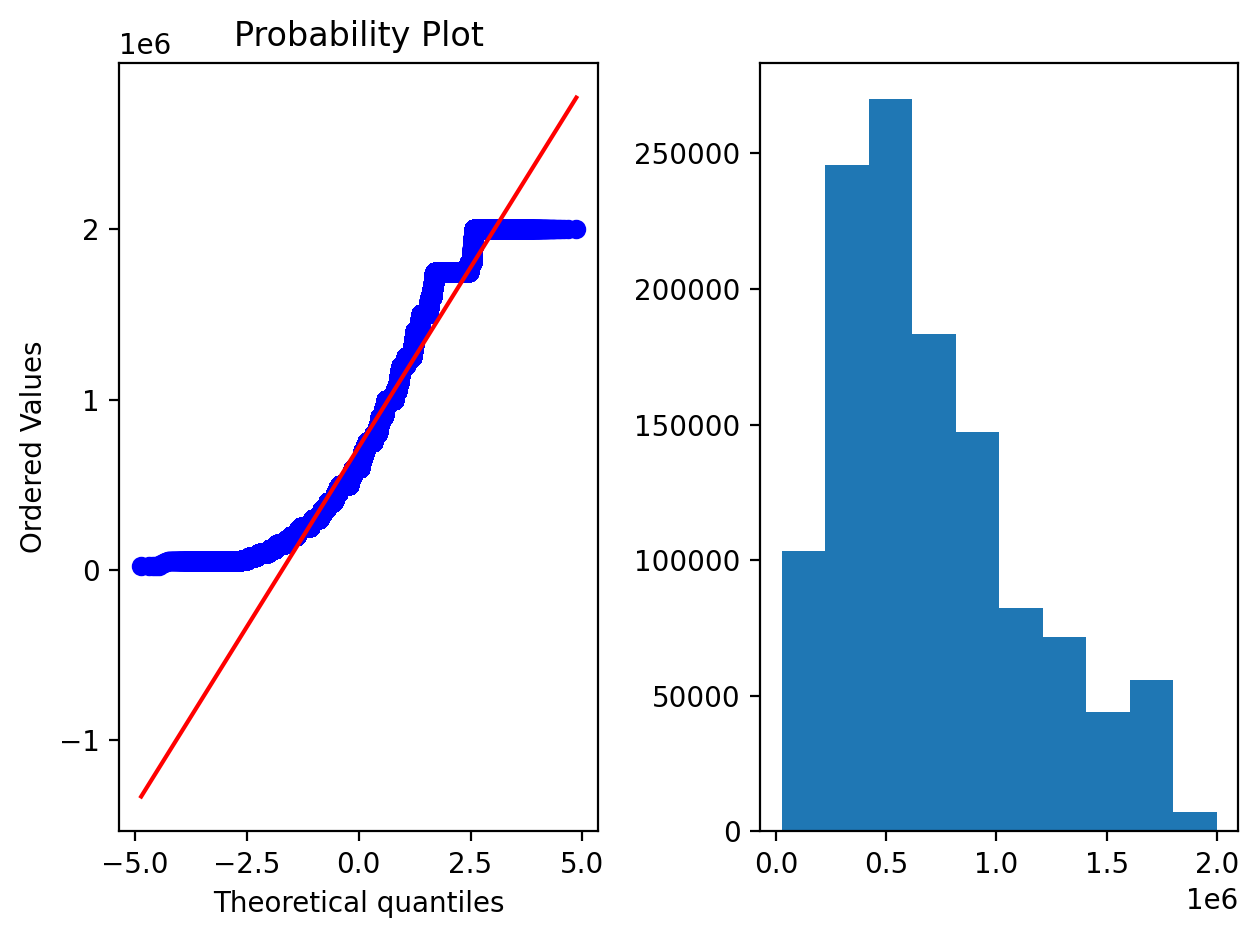

In [ ]:
plt.subplot(1, 2, 1) 
stats.probplot(train_clean['сумма_займа'], plot=plt) 

plt.subplot(1, 2, 2) # второй рисунок рядом
plt.hist(train_clean['сумма_займа']) # гистограмма распределения

plt.tight_layout()
plt.show()

К-к график показывает, что точки не распологаются на диагонали. Распределение суммы займа не является нормальным

Text(0, 0.5, 'сумма_займа')

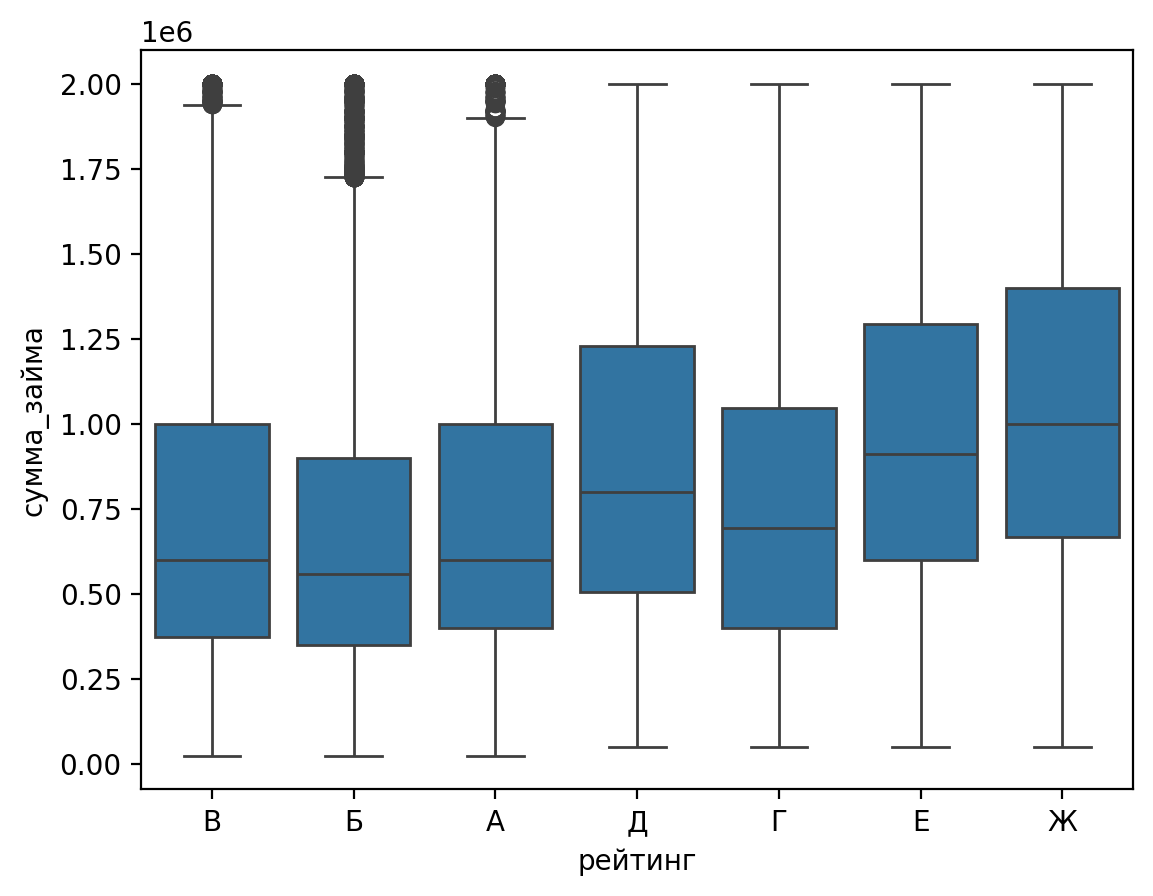

In [414]:
boxplot = sns.boxplot(
    data=train_clean,
    x='рейтинг',  
    y='сумма_займа', 
    order=['В', 'Б', 'А', 'Д', 'Г', 'Е', 'Ж'],  # Порядок рейтингов
)

boxplot.set_xlabel('рейтинг')
boxplot.set_ylabel('сумма_займа')

### **4. Создание признаков**

Видим, что у нас есть 19 столбцов типа object. Одни из них – *срок_займа*, *стаж*, *тип_предоставления_кредита*.  
В *срок_займа* есть всего два срока – это '3 года', '5 лет'.  
В *стаж* есть разные значения в том числе и NaN.  
В *тип_предоставления_кредита*  есть два значения – 'Наличные', 'Перевод'.

Переделаем на текущий момент *срок_займа*

In [415]:
train_clean['срок_займа'] = train_clean['срок_займа'].str.extract(r'(\d+)').astype(int)

In [416]:
cat_cols = train_clean.select_dtypes(include=['object']).columns.tolist()
cat_cols

['рейтинг',
 'владение_жильем',
 'подтвержден_ли_доход',
 'пос_стоп_фактор',
 'юридический_статус',
 'дата_первого_займа',
 'первоначальный_статус_займа']

In [417]:
print(train_clean['рейтинг'].unique())

['В' 'Б' 'А' 'Д' 'Г' 'Е' 'Ж']


Предположим, что *рейтинг* от А до В - надёжный (0), от Г до Ж - рискованный (1). 

In [418]:
# 1. рейтинг
rating = {
    'А': 0, 'Б': 0, 'В': 0,         # 0 - Надежный
    'Г': 1, 'Д': 1, 'Е': 1, 'Ж': 1  # 1 - Рискованный  
}
train_clean['рейтинг'] = train_clean['рейтинг'].map(rating)
# train_clean['рейтинг_заемщика'] = train_clean['рейтинг'].map(rating)
# train_clean = train_clean.drop('рейтинг', axis=1)

# 2. владение_жильем

# train_clean['тип_жилья'] = train_clean['владение_жильем'].replace({
#     'ЛЮБОЕ': 'ДРУГОЕ',
#     'НЕТ': 'ДРУГОЕ'
# })
# train_clean = pd.get_dummies(
#     train_clean, 
#     columns=['тип_жилья'], 
#     prefix='жильё'
# )

train_clean['владение_жильем'] = (train_clean['владение_жильем'] == 'СОБСТВЕННОЕ').astype(int)
# train_clean['есть_собственное_жилье'] = (train_clean['владение_жильем'] == 'СОБСТВЕННОЕ').astype(int)
# train_clean = train_clean.drop('владение_жильем', axis=1)

# 3. подтвержден_ли_доход
income = {
    'Не подтвержден': 0,
    'Подтвержден источник': 1,
    'Подтвержден': 1
}
train_clean['подтвержден_ли_доход'] = train_clean['подтвержден_ли_доход'].map(income)
# train_clean['доход_подтверждён'] = train_clean['подтвержден_ли_доход'].map(income)
# train_clean = train_clean.drop('подтвержден_ли_доход', axis=1)

# 4. пос_стоп_фактор
stop_factor = {
    'Нет': 0,            # клиент не проблемный
    'Под вопросом': 1,
    'Да': 1
}
train_clean['пос_стоп_фактор'] = train_clean['пос_стоп_фактор'].map(stop_factor)
# train_clean['ПОС_стоп'] = train_clean['пос_стоп_фактор'].map(stop_factor)
# train_clean = train_clean.drop('пос_стоп_фактор', axis=1)

# 5. юридический_статус
legal_status = {
    'Нет': 0,
    'Да': 1
}
train_clean['юридический_статус'] = train_clean['юридический_статус'].map(legal_status)
# train_clean['юрид_статус'] = train_clean['юридический_статус'].map(legal_status)
# train_clean = train_clean.drop('юридический_статус', axis=1)

# 6. дата_первого_займа
# train_clean['дата'] = pd.to_datetime(
#     train_clean['дата_первого_займа'],
#     format='%m-%Y',
#     errors='coerce'
# )
# train_clean['год'] = train_clean['дата'].dt.year
# train_clean['месяц'] = train_clean['дата'].dt.month

reference_date = pd.to_datetime('2023-12-31')
train_clean['дата_первого_займа'] = (reference_date - pd.to_datetime(train_clean['дата_первого_займа'], format='%Y-%m-%d', errors='coerce')).dt.days
# train_clean['возраст_займа_в_днях'] = (reference_date - pd.to_datetime(train_clean['дата_первого_займа'], errors='coerce')).dt.days
# train_clean = train_clean.drop('дата_первого_займа', axis=1)

# 7. первоначальный_статус_займа
initial_loan_status = {
    'а': 0,
    'б': 1
}
train_clean['первоначальный_статус_займа'] = train_clean['первоначальный_статус_займа'].map(initial_loan_status)
# train_clean['перв_статус_займа'] = train_clean['первоначальный_статус_займа'].map(initial_loan_status)
# train_clean = train_clean.drop('первоначальный_статус_займа', axis=1)

In [419]:
pd.set_option('display.max_columns', 110)
train_clean.head()

,id,сумма_займа,срок_займа,процентная_ставка,аннуитет,рейтинг,владение_жильем,годовой_доход,подтвержден_ли_доход,итоговый_статус_займа,рейтинг_OCR,кол_во_субсидий_за_год,пдн,пос_стоп_фактор,юридический_статус,кол-во_просрочек_за_два_года,дата_первого_займа,нижний_порог_рейтинга_заемщика,верхний_порог_рейтинга_заемщика,кол-во_заявок_за_полгода,кол-во_открытых_счетов,кол-во_записей_в_общедоступных_документах,оборотный_баланс,коэфф_загрузки_возобновляемого_счета,кол-во_счетов,первоначальный_статус_займа,сумма_выплат_по_просрочкам,грейд_на_детерминаторе,кол-во_взысканий_за_последний_год,возвраты_с_учетом_мпл,кол-во_публ_банкротств,кол-во_залогов,лимит_по_картам
0,68355089,1235000.0,3,11.99,41014.0,0,0,1300000.0,0,0,4,0,16.06,0,0,1.0,NaN,715.0,719.0,4.0,22.0,0.0,21470.0,19.2,38.0,0,0.0,5,0.0,12213,0.0,0.0,3965000.0
1,68341763,1000000.0,5,10.78,21633.0,0,0,1260000.0,0,0,2,0,10.78,0,0,0.0,NaN,695.0,699.0,0.0,6.0,0.0,7869.0,56.2,18.0,0,0.0,1,0.0,36245,0.0,0.0,310000.0
2,68426831,597500.0,3,13.44,20259.0,0,0,680000.0,1,0,3,0,10.20,1,0,0.0,NaN,690.0,694.0,0.0,5.0,0.0,8822.0,68.4,6.0,0,0.0,4,0.0,53551,0.0,0.0,470000.0
3,68476668,1000000.0,3,9.17,31879.0,0,0,3600000.0,0,0,1,0,14.67,0,0,0.0,NaN,680.0,684.0,0.0,12.0,0.0,87329.0,84.5,27.0,1,0.0,3,0.0,48391,0.0,0.0,1575000.0
4,67275481,1000000.0,3,8.49,31563.0,0,0,1700000.0,0,0,4,0,17.61,0,1,1.0,NaN,705.0,709.0,0.0,8.0,0.0,826.0,5.7,15.0,0,0.0,2,0.0,96028,0.0,0.0,725000.0


### **5. Нормализация/Станартизация**

In [420]:
import matplotlib.style
from sklearn import preprocessing

### *Min max Scaler*

In [421]:
df = train_clean[['годовой_доход', 'сумма_займа']].copy()
col_names = list(df.columns)

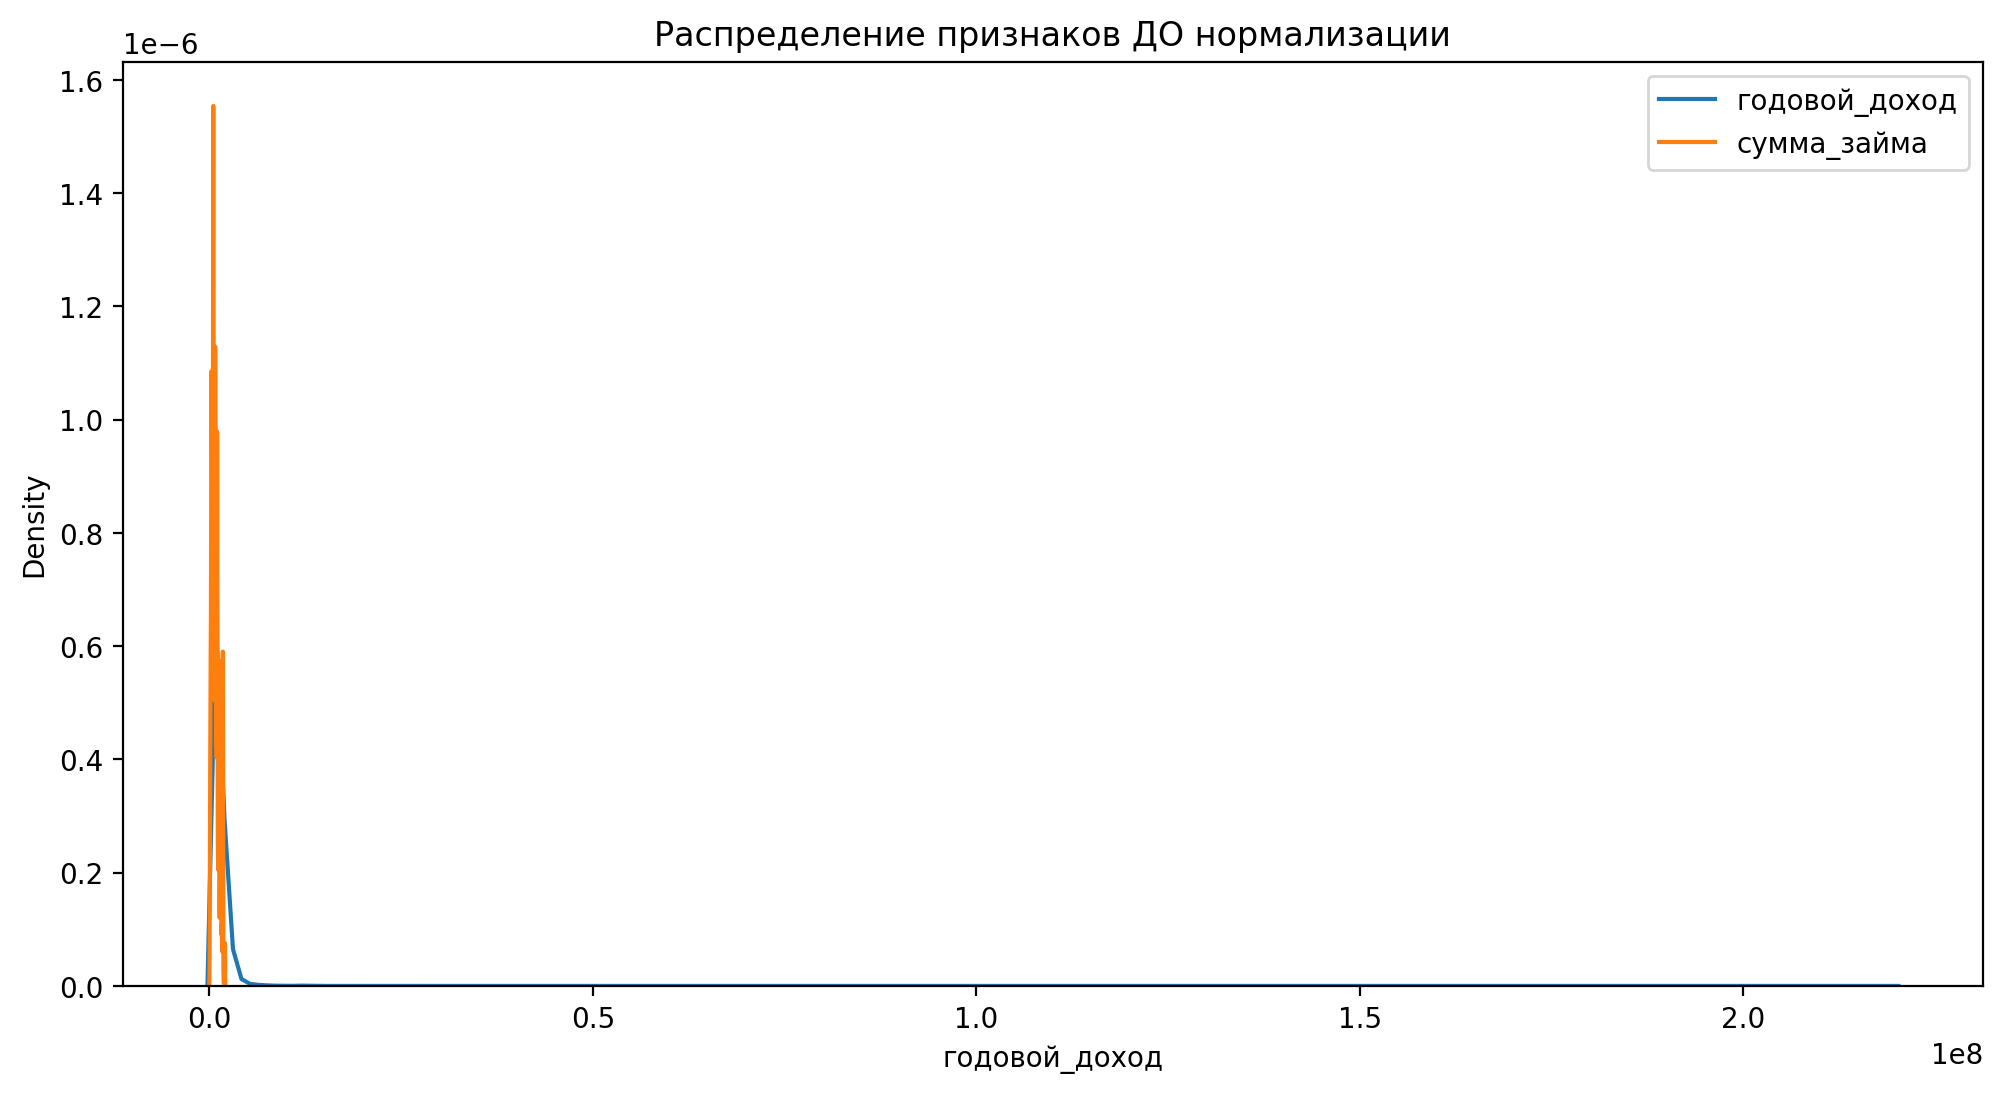

In [422]:
plt.figure(figsize=(12, 6))
plt.title('Распределение признаков ДО нормализации')
for column in df.columns:
    sns.kdeplot(df[column], label=column)
plt.legend()
plt.show()

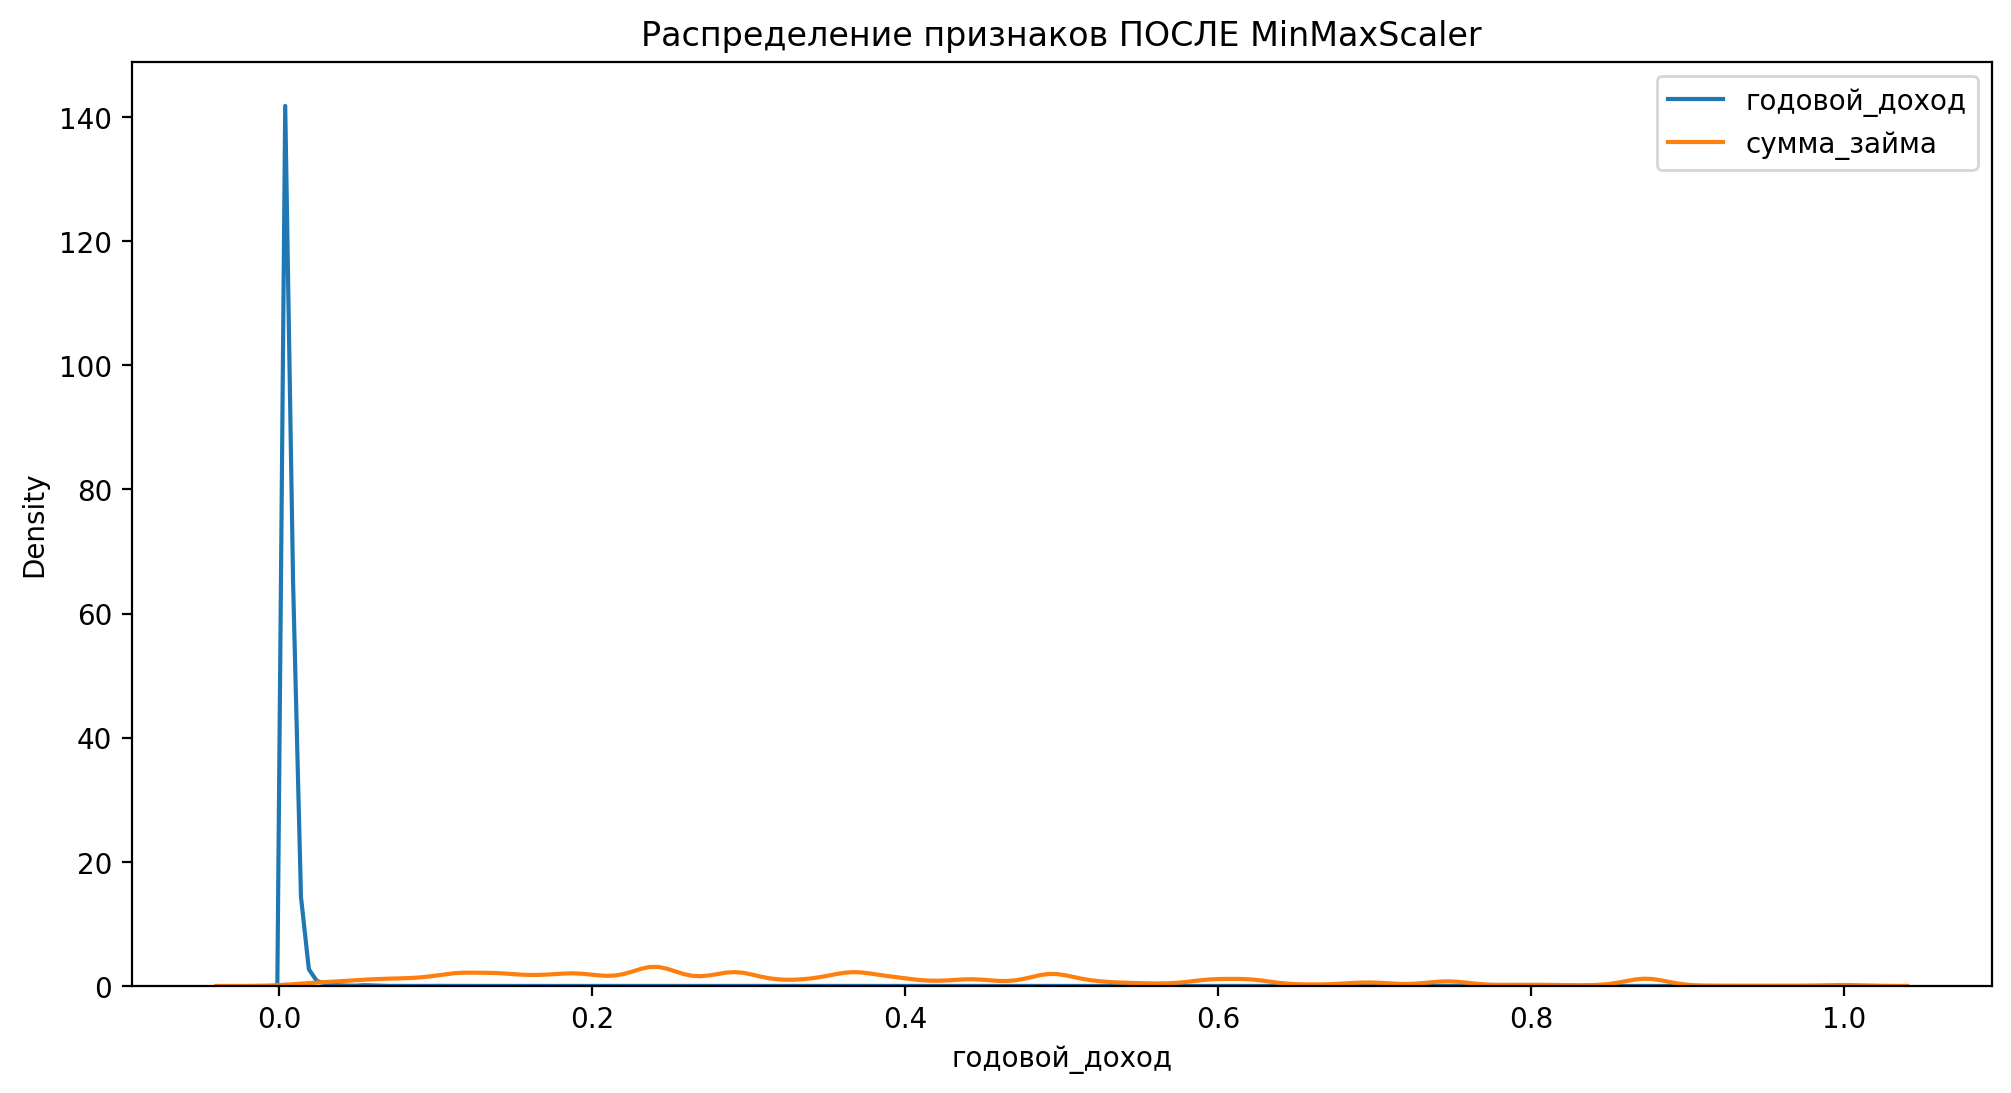

In [423]:
mm_scaler = preprocessing.MinMaxScaler()
df_mm = mm_scaler.fit_transform(df)
# Преобразуем промежуточный датасет в полноценный датафрейм для визуализации
df_mm = pd.DataFrame(df_mm, columns=col_names)

plt.figure(figsize=(12, 6))
plt.title('Распределение признаков ПОСЛЕ MinMaxScaler')
for column in df_mm.columns:
    sns.kdeplot(df_mm[column], label=column)
plt.legend()
plt.show()

In [424]:
display(df_mm.describe())

,годовой_доход,сумма_займа
count,1.210779e+06,1.210779e+06
mean,6.933706e-03,3.524229e-01
std,6.369444e-03,2.206691e-01
min,0.000000e+00,0.000000e+00
25%,4.160303e-03,1.898734e-01
50%,5.909521e-03,2.911392e-01
75%,8.182413e-03,4.936709e-01
max,1.000000e+00,1.000000e+00


In [425]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

numeric_cols = train_clean.select_dtypes(include=['int64', 'float64']).columns.tolist()
train_normalized = train_clean.copy()
train_normalized[numeric_cols] = scaler.fit_transform(train_clean[numeric_cols])

print(train_normalized[numeric_cols].describe())

c:\Users\akres\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_array_api.py:776: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
c:\Users\akres\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\_array_api.py:793: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


                 id   сумма_займа    срок_займа  процентная_ставка      аннуитет       рейтинг  владение_жильем  годовой_доход  подтвержден_ли_доход  итоговый_статус_займа   рейтинг_OCR  кол_во_субсидий_за_год           пдн  пос_стоп_фактор  юридический_статус  кол-во_просрочек_за_два_года  дата_первого_займа  нижний_порог_рейтинга_заемщика  верхний_порог_рейтинга_заемщика  кол-во_заявок_за_полгода  кол-во_открытых_счетов  кол-во_записей_в_общедоступных_документах  оборотный_баланс  коэфф_загрузки_возобновляемого_счета  кол-во_счетов  первоначальный_статус_займа  сумма_выплат_по_просрочкам  грейд_на_детерминаторе  кол-во_взысканий_за_последний_год  возвраты_с_учетом_мпл  кол-во_публ_банкротств  кол-во_залогов  лимит_по_картам
count  1.210779e+06  1.210779e+06  1.210779e+06       1.210779e+06  1.210779e+06  1.210779e+06        1210779.0   1.210779e+06          1.210779e+06           1.210779e+06  1.210779e+06            1.210779e+06  1.210779e+06     1.210779e+06        1.210779e+06    

### *Окончательный вариант файла*

In [426]:
train_clean.to_csv('D:/Skillfactory/data/SHIFT/shift_ml_train.csv', index=False)

# **Обучение**

In [ ]:
from sklearn.linear_model import LogisticRegression
scaler = StandardScaler()
from sklearn.preprocessing import StandardScaler

from tqdm import tqdm

In [428]:
# Очищенный train
train = pd.read_csv('D:/Skillfactory/data/SHIFT/shift_ml_train.csv')
target = train['итоговый_статус_займа']
# Не тронутый test
test = pd.read_csv('D:/Skillfactory/data/shift_ml_2025_test.csv')

# "Выбираем только нужные признаки"
# Было первых два признака, я добавила больше
features = ['сумма_займа', 'лимит_по_картам', 'процентная_ставка', 'годовой_доход',
            'кол-во_просрочек_за_два_года', 'кол-во_залогов','кол_во_субсидий_за_год']
X_train = train[features]
X_train = X_train.fillna(0)

y_train = target
X_test = test[features]
X_test = X_test.fillna(0)

# делаем так, чтобы train и test совпадали по колич строк
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Обучаем логистическую регрессию
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Делаем предсказания
test_predict = model.predict_proba(X_test)[:, 1]

# Формируем сабмит
answer = pd.DataFrame()
answer['id'] = test['id']
answer['proba'] = test_predict
answer.to_csv('submission.csv', index=False)


In [429]:
from sklearn.metrics import roc_auc_score

y_pred_proba = model.predict_proba(X_train)[:, 1]
print(f"ROC-AUC: {roc_auc_score(y_train, y_pred_proba):.3f}")

ROC-AUC: 0.648
